# 1. Pengumpulan Data
Dataset didapatkan dari : https://archive.ics.uci.edu/dataset/45/heart+disease

Data yang digunakan yaitu file 'hungarian.data' dimana deskripsinya terdapat pada file 'heart-disease.names'

# 2. Menelaah Data

## Load Data

In [338]:
import pandas as pd
file_path = 'heart+disease\hungarian.data'

with open(file_path, 'r') as file:
    raw_data = file.read()

raw_data = raw_data.strip().split('name')
raw_data.pop()
cleaned_data = [string.replace('\n\n', ' ').replace('\n', ' ').strip().split(' ') for string in raw_data]
data = pd.DataFrame(cleaned_data)
data = data.astype(float)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,-9.0,2.0,140.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,-9.0,3.0,160.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,-9.0,2.0,130.0,...,-9.0,-9.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,-9.0,4.0,138.0,...,-9.0,2.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,-9.0,3.0,150.0,...,-9.0,1.0,-9.0,1.0,1.0,1.0,1.0,1.0,-9.0,-9.0


# 3. Validasi Data

Merubah data -9.0 menjadi nan, dikarenakan dalam dokumentasi nilai tersebut merupakan missing value.

In [339]:
import numpy as np

data = data.where(data >= 0, np.nan)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


# 4. Menentukan Fitur Data

sesuai dengan dokumentasi terdapat 14 fitur yang digunakan yaitu : 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'

In [340]:
column_feature = [2, 3, 8, 9, 11, 15, 18, 31, 37, 39, 40, 43, 50, 57]
data_filtered = data.iloc[:, column_feature]

column_mapping = {
    2: 'age',
    3: 'sex',
    8: 'cp',
    9: 'trestbps',
    11: 'chol',
    15: 'fbs',
    18: 'restecg',
    31: 'thalach',
    37: 'exang',
    39: 'oldpeak',
    40: 'slope',
    43: 'ca',
    50: 'thal',
    57: 'target',
}

data_filtered = data_filtered.rename(columns=column_mapping)
data_filtered.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


# 5. Membersihkan Data

mengisi null value / nan dalam data dengan rata rata, mengahapus data duplikasi

In [341]:
data_filtered.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [342]:
meanTrestbps = round(data_filtered.trestbps.dropna().mean())
meanChol = round(data_filtered.chol.dropna().mean())
meanFbs = round(data_filtered.fbs.dropna().mean())
meanRestecg = round(data_filtered.restecg.dropna().mean())
meanThalach = round(data_filtered.thalach.dropna().mean())
meanExang = round(data_filtered.exang.dropna().mean())
meanSlope = round(data_filtered.slope.dropna().mean())
meanCa = round(data_filtered.ca.dropna().mean())
meanThal = round(data_filtered.thal.dropna().mean())

In [343]:
mean_values = {
    'trestbps': meanTrestbps,
    'chol': meanChol,
    'fbs': meanFbs,
    'restecg': meanRestecg,
    'thalach': meanThalach,
    'exang': meanExang,
    'slope': meanSlope,
    'ca': meanCa,
    'thal': meanThal
}

data_cleaned = data_filtered.fillna(value=mean_values)
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,2.0,6.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,2.0,6.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,2.0,6.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,2.0,6.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,2.0,6.0,0.0


In [344]:
data_cleaned.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [345]:
data_cleaned = data_cleaned.drop_duplicates()
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,2.0,2.0,6.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,2.0,6.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,2.0,2.0,6.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,2.0,6.0,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,2.0,2.0,6.0,0.0


<Axes: >

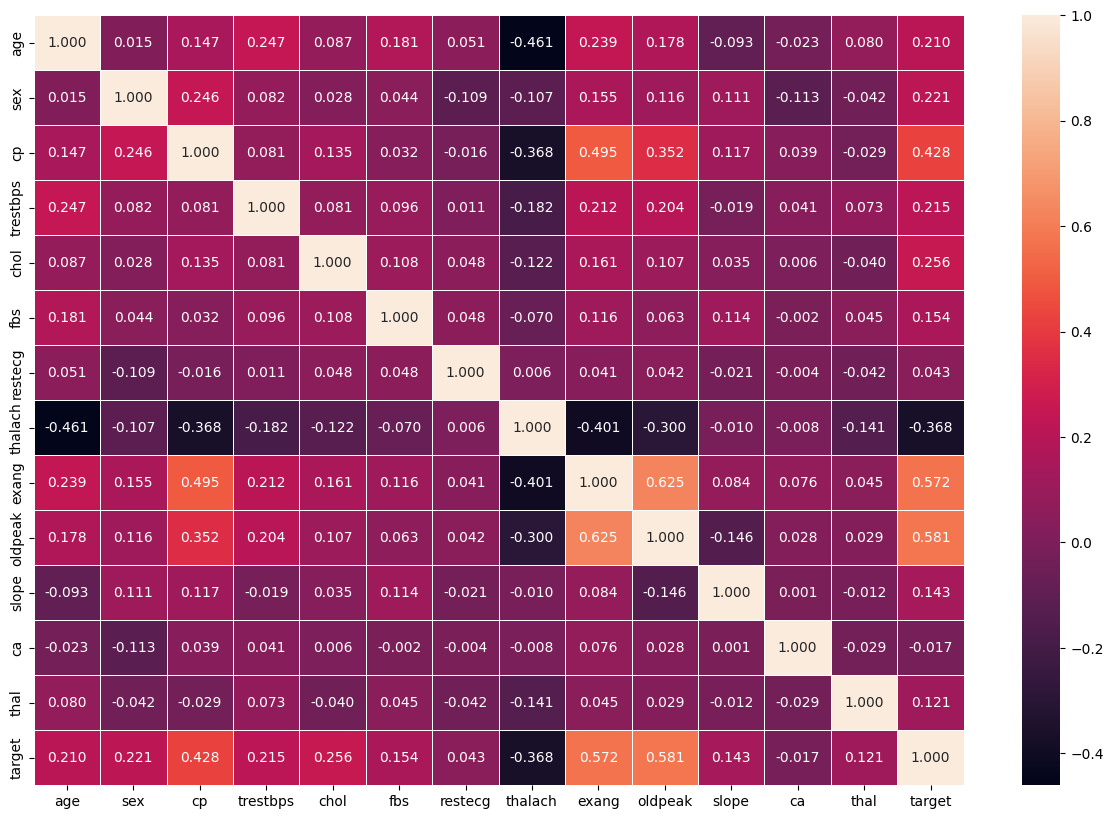

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_mat=data_cleaned.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

# 6.Konstruksi Data
penyesuaian fitur data, pemisahan label dengan fitur, penanganan data inbalance, normalisasi data

In [347]:
X = data_cleaned.drop("target",axis=1).values
y = data_cleaned.iloc[:,-1]

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64


d:\Conda\envs\YOLO\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Conda\envs\YOLO\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Conda\envs\YOLO\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


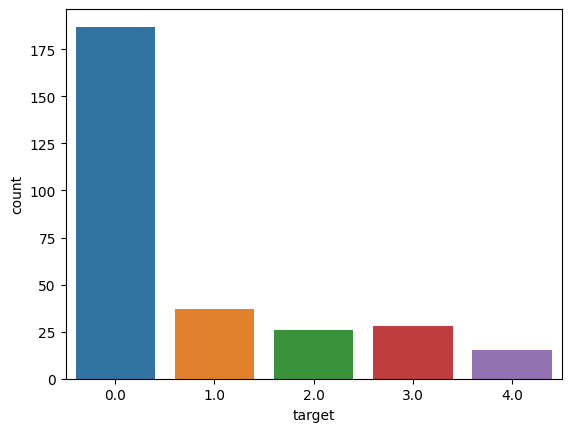

In [348]:
print(data_cleaned['target'].value_counts())

sns.countplot(x="target", data=data_cleaned)
plt.show()

In [378]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Oversampling
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

# Undersampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

C:\Users\PLWEP\AppData\Local\Temp\ipykernel_7408\2482045058.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


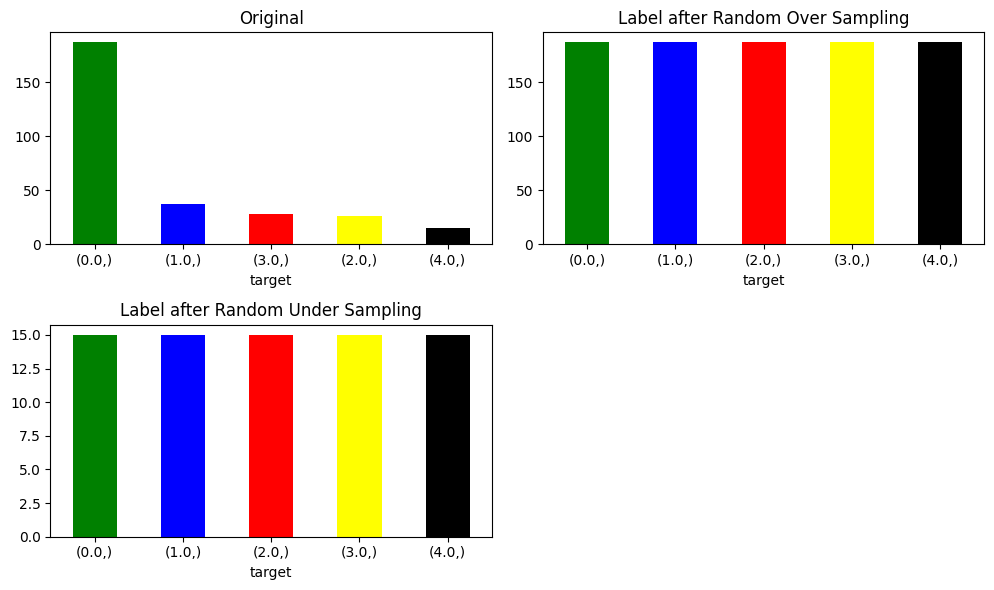

In [386]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 12))

# Subplot 1
plt.subplot(2, 2, 1)
label = pd.DataFrame(data=y)
label.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Original")
plt.xticks(rotation=0)

# Subplot 2
plt.subplot(2, 2, 2)
label_smote = pd.DataFrame(data=y_ros)
label_smote.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Over Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

# Subplot 3
plt.subplot(2, 2, 3)
label_tomekLinks = pd.DataFrame(data=y_rus)
label_tomekLinks.value_counts().plot(kind='bar', figsize=(10, 6), color=['green', 'blue', 'red', 'yellow', 'black'])
plt.title("Label after Random Under Sampling")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

In [380]:
temp = pd.DataFrame(X)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.521645,0.726962,0.662116,0.376501,0.320193,0.068259,0.109215,0.528315,0.303754,0.117611,0.481229,0.222601,0.741468
std,0.205918,0.446282,0.321683,0.162748,0.125597,0.252622,0.230434,0.218130,0.460665,0.181911,0.103810,0.050783,0.125563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368421,0.000000,0.333333,0.259259,0.243243,0.000000,0.000000,0.370370,0.000000,0.000000,0.500000,0.222222,0.750000
50%,0.552632,1.000000,0.666667,0.351852,0.314672,0.000000,0.000000,0.537037,0.000000,0.000000,0.500000,0.222222,0.750000
75%,0.684211,1.000000,1.000000,0.444444,0.370656,0.000000,0.000000,0.675926,1.000000,0.200000,0.500000,0.222222,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X_ros = scaler.fit_transform(X_ros)
X_rus = scaler.fit_transform(X_rus)

In [382]:
temp = pd.DataFrame(X)
temp.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,0.521645,0.726962,0.662116,0.376501,0.320193,0.068259,0.109215,0.528315,0.303754,0.117611,0.481229,0.222601,0.741468
std,0.205918,0.446282,0.321683,0.162748,0.125597,0.252622,0.230434,0.218130,0.460665,0.181911,0.103810,0.050783,0.125563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.368421,0.000000,0.333333,0.259259,0.243243,0.000000,0.000000,0.370370,0.000000,0.000000,0.500000,0.222222,0.750000
50%,0.552632,1.000000,0.666667,0.351852,0.314672,0.000000,0.000000,0.537037,0.000000,0.000000,0.500000,0.222222,0.750000
75%,0.684211,1.000000,1.000000,0.444444,0.370656,0.000000,0.000000,0.675926,1.000000,0.200000,0.500000,0.222222,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [385]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)


X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=42,stratify=y_ros)
X_valid_ros, X_test_ros, y_valid_ros, y_test_ros = train_test_split(X_test_ros, y_test_ros, test_size=0.5, random_state=42, stratify=y_test_ros)

X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=42,stratify=y_rus)
X_valid_rus, X_test_rus, y_valid_rus, y_test_rus = train_test_split(X_test_rus, y_test_rus, test_size=0.5, random_state=42, stratify=y_test_rus)


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

# 7. Model


## KNN

In [387]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

knn_model_ros = KNeighborsClassifier(n_neighbors = 3)
knn_model_ros.fit(X_train_ros, y_train_ros)

knn_model_rus = KNeighborsClassifier(n_neighbors = 3)
knn_model_rus.fit(X_train_rus, y_train_rus)

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

KNeighborsClassifier(n_neighbors=3)

In [423]:
from sklearn.metrics import accuracy_score

y_pred_knn = knn_model.predict(X_test)
accuracy_knn = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy KNN Original Dataset:", accuracy_knn)

y_pred_knn_ros = knn_model_ros.predict(X_test_ros)
accuracy_knn_ros = round(accuracy_score(y_test_ros,y_pred_knn_ros),3)
print("Accuracy KNN Random Over Sampling Dataset:", accuracy_knn_ros)

y_pred_knn_rus = knn_model_rus.predict(X_test_rus)
accuracy_knn_rus = round(accuracy_score(y_test_rus,y_pred_knn_rus),3)
print("Accuracy KNN Random Under Sampling Dataset:", accuracy_knn_rus)

Accuracy KNN Original Dataset: 0.614
Accuracy KNN Random Over Sampling Dataset: 0.894
Accuracy KNN Random Under Sampling Dataset: 0.25


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [424]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_knn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_knn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84        28
         1.0       0.17      0.17      0.17         6
         2.0       0.00      0.00      0.00         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.61        44
   macro avg       0.19      0.22      0.20        44
weighted avg       0.51      0.61      0.56        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        28
         1.0       0.89      0.89      0.89        28
         2.0       0.78      1.00      0.88        28
         3.0       1.00      0.86      0.93        29
         4.0       0.88      1.00      0.93        28

    accuracy                           0.89       141
   macro avg       0.91      0.89      0.89       141
weighted avg       0.91    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

## SVM

In [391]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

svm_model_ros = SVC()
svm_model_ros.fit(X_train_ros, y_train_ros)

svm_model_rus = SVC()
svm_model_rus.fit(X_train_rus, y_train_rus)

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

SVC()

In [425]:
from sklearn.metrics import accuracy_score

y_pred_svm = svm_model.predict(X_test)
accuracy_svm = round(accuracy_score(y_test,y_pred_svm),3)
print("Accuracy SVM Original Dataset:", accuracy_svm)

y_pred_svm_ros = svm_model_ros.predict(X_test_ros)
accuracy_svm_ros = round(accuracy_score(y_test_ros,y_pred_svm_ros),3)
print("Accuracy SVM Random Over Sampling Dataset:", accuracy_svm_ros)

y_pred_svm_rus = svm_model_rus.predict(X_test_rus)
accuracy_svm_rus = round(accuracy_score(y_test_rus,y_pred_svm_rus),3)
print("Accuracy SVM Random Under Sampling Dataset:", accuracy_svm_rus)

Accuracy SVM Original Dataset: 0.682
Accuracy SVM Random Over Sampling Dataset: 0.645
Accuracy SVM Random Under Sampling Dataset: 0.417


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [426]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_svm_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_svm_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       0.00      0.00      0.00         6
         2.0       0.29      0.50      0.36         4
         3.0       0.33      0.25      0.29         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.68        44
   macro avg       0.28      0.34      0.30        44
weighted avg       0.56      0.68      0.61        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.63      0.79      0.70        28
         1.0       0.67      0.43      0.52        28
         2.0       0.54      0.68      0.60        28
         3.0       0.71      0.41      0.52        29
         4.0       0.72      0.93      0.81        28

    accuracy                           0.65       141
   macro avg       0.65      0.65      0.63       141
weighted avg       0.65    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

## Decision Tree

In [395]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

dt_model_ros = DecisionTreeClassifier()
dt_model_ros.fit(X_train_ros, y_train_ros)

dt_model_rus = DecisionTreeClassifier()
dt_model_rus.fit(X_train_rus, y_train_rus)

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

DecisionTreeClassifier()

In [427]:
from sklearn.metrics import accuracy_score

y_pred_dt = dt_model.predict(X_test)
accuracy_dt = round(accuracy_score(y_test,y_pred_dt),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_dt)

y_pred_dt_ros = dt_model_ros.predict(X_test_ros)
accuracy_dt_ros = round(accuracy_score(y_test_ros,y_pred_dt_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_dt_ros)

y_pred_dt_rus = dt_model_rus.predict(X_test_rus)
accuracy_dt_rus = round(accuracy_score(y_test_rus,y_pred_dt_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_dt_rus)

Accuracy Decision Tree Original Dataset: 0.705
Accuracy Decision Tree Random Over Sampling Dataset: 0.936
Accuracy Decision Tree Random Under Sampling Dataset: 0.167


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [428]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dt_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dt_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       0.67      0.33      0.44         6
         2.0       0.33      0.25      0.29         4
         3.0       1.00      0.25      0.40         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.70        44
   macro avg       0.56      0.36      0.40        44
weighted avg       0.72      0.70      0.68        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        28
         1.0       0.85      1.00      0.92        28
         2.0       0.88      1.00      0.93        28
         3.0       1.00      1.00      1.00        29
         4.0       1.00      1.00      1.00        28

    accuracy                           0.94       141
   macro avg       0.94      0.94      0.93       141
weighted avg       0.95    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

## Random Forest

In [399]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

rf_model_ros = RandomForestClassifier()
rf_model_ros.fit(X_train_ros, y_train_ros)

rf_model_rus = RandomForestClassifier()
rf_model_rus.fit(X_train_rus, y_train_rus)

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

RandomForestClassifier()

In [429]:
from sklearn.metrics import accuracy_score

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = round(accuracy_score(y_test,y_pred_rf),3)
print("Accuracy Decision Tree Original Dataset:", accuracy_rf)

y_pred_rf_ros = rf_model_ros.predict(X_test_ros)
accuracy_rf_ros = round(accuracy_score(y_test_ros,y_pred_rf_ros),3)
print("Accuracy Decision Tree Random Over Sampling Dataset:", accuracy_rf_ros)

y_pred_rf_rus = rf_model_rus.predict(X_test_rus)
accuracy_rf_rus = round(accuracy_score(y_test_rus,y_pred_rf_rus),3)
print("Accuracy Decision Tree Random Under Sampling Dataset:", accuracy_rf_rus)

Accuracy Decision Tree Original Dataset: 0.659
Accuracy Decision Tree Random Over Sampling Dataset: 0.965
Accuracy Decision Tree Random Under Sampling Dataset: 0.417


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [430]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_rf_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_rf_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85        28
         1.0       1.00      0.17      0.29         6
         2.0       0.17      0.25      0.20         4
         3.0       0.25      0.25      0.25         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.66        44
   macro avg       0.44      0.32      0.32        44
weighted avg       0.68      0.66      0.62        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        28
         1.0       0.97      1.00      0.98        28
         2.0       0.93      1.00      0.97        28
         3.0       0.97      1.00      0.98        29
         4.0       0.97      1.00      0.98        28

    accuracy                           0.96       141
   macro avg       0.97      0.96      0.96       141
weighted avg       0.97    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

## ANN

In [402]:
import tensorflow as tf

def create_model_ann() :
    model_ann = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model_ann


In [403]:
ann_model = create_model_ann()
ann_model_ros = create_model_ann()
ann_model_rus = create_model_ann()

In [404]:
ann_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
ann_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
ann_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [431]:
from sklearn.metrics import accuracy_score

y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)
accuracy_ann = round(accuracy_score(y_test,y_pred_ann),3)
print("Accuracy Artificial Neural Network Original Dataset:", accuracy_ann)

y_pred_ann_ros = np.argmax(ann_model_ros.predict(X_test_ros), axis=1)
accuracy_ann_ros = round(accuracy_score(y_test_ros,y_pred_ann_ros),3)
print("Accuracy Artificial Neural Network Random Over sampling Dataset:", accuracy_ann_ros)

y_pred_ann_rus = np.argmax(ann_model_rus.predict(X_test_rus), axis=1)
accuracy_ann_rus = round(accuracy_score(y_test_rus,y_pred_ann_rus),3)
print("Accuracy Artificial Neural Network Random Under Sampling Dataset:", accuracy_ann_rus)

2/2 [==============================] - 0s 8ms/step
Accuracy Artificial Neural Network Original Dataset: 0.727
5/5 [==============================] - 0s 4ms/step
Accuracy Artificial Neural Network Random Over sampling Dataset: 0.589
1/1 [==============================] - 0s 28ms/step
Accuracy Artificial Neural Network Random Under Sampling Dataset: 0.5


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [432]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_ann))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_ann_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_ann_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87        28
         1.0       1.00      0.33      0.50         6
         2.0       0.33      0.50      0.40         4
         3.0       0.50      0.25      0.33         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.73        44
   macro avg       0.53      0.41      0.42        44
weighted avg       0.72      0.73      0.69        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       0.66      0.82      0.73        28
         1.0       0.43      0.32      0.37        28
         2.0       0.49      0.68      0.57        28
         3.0       0.71      0.41      0.52        29
         4.0       0.69      0.71      0.70        28

    accuracy                           0.59       141
   macro avg       0.59      0.59      0.58       141
weighted avg       0.59    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

## DNN

In [409]:
def create_model_dnn() :
    model_dnn = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model_dnn


In [410]:
dnn_model = create_model_dnn()
dnn_model_ros = create_model_dnn()
dnn_model_rus = create_model_dnn()

In [411]:
dnn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_valid, y_valid), verbose=0)
dnn_model_ros.fit(X_train_ros, y_train_ros, epochs=50, batch_size=16, validation_data=(X_valid_ros, y_valid_ros), verbose=0)
dnn_model_rus.fit(X_train_rus, y_train_rus, epochs=50, batch_size=16, validation_data=(X_valid_rus, y_valid_rus), verbose=0)

In [433]:
from sklearn.metrics import accuracy_score

y_pred_dnn = np.argmax(dnn_model.predict(X_test), axis=1)
accuracy_dnn = round(accuracy_score(y_test,y_pred_dnn),3)
print("Accuracy Deep Neural Network Original Dataset:", accuracy_dnn)

y_pred_dnn_ros = np.argmax(dnn_model_ros.predict(X_test_ros), axis=1)
accuracy_dnn_ros = round(accuracy_score(y_test_ros,y_pred_dnn_ros),3)
print("Accuracy Deep Neural Network Random Over Sampling Dataset:", accuracy_dnn_ros)

y_pred_dnn_rus = np.argmax(dnn_model_rus.predict(X_test_rus), axis=1)
accuracy_dnn_rus = round(accuracy_score(y_test_rus,y_pred_dnn_rus),3)
print("Accuracy Deep Neural Network Random Under Sampling Dataset:", accuracy_dnn_rus)

2/2 [==============================] - 0s 6ms/step
Accuracy Deep Neural Network Original Dataset: 0.727
5/5 [==============================] - 0s 4ms/step
Accuracy Deep Neural Network Random Over Sampling Dataset: 0.844
1/1 [==============================] - 0s 25ms/step
Accuracy Deep Neural Network Random Under Sampling Dataset: 0.333


d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

In [434]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))

print("Classification Report ROS:")
print(classification_report(y_test_ros, y_pred_dnn_ros))

print("Classification Report RUS:")
print(classification_report(y_test_rus, y_pred_dnn_rus))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.96      0.89        28
         1.0       1.00      0.33      0.50         6
         2.0       0.43      0.75      0.55         4
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2

    accuracy                           0.73        44
   macro avg       0.45      0.41      0.39        44
weighted avg       0.70      0.73      0.68        44

Classification Report ROS:
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        28
         1.0       0.85      0.82      0.84        28
         2.0       0.76      0.79      0.77        28
         3.0       0.84      0.90      0.87        29
         4.0       0.82      1.00      0.90        28

    accuracy                           0.84       141
   macro avg       0.85      0.84      0.84       141
weighted avg       0.85    

d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\Conda\envs\YOLO\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\Conda

# 8. Evaluasi
evaluasi hasil setiap model

In [435]:
import pandas as pd

# Data
models = ['KNN', 'SVM', 'DT', 'RF', 'ANN', 'DNN']
accuracy_original = [accuracy_knn*100, accuracy_svm*100, accuracy_dt*100, accuracy_rf*100, accuracy_ann*100, accuracy_dnn*100]
accuracy_ros = [accuracy_knn_ros*100, accuracy_svm_ros*100, accuracy_dt_ros*100, accuracy_rf_ros*100, accuracy_ann_ros*100, accuracy_dnn_ros*100]
accuracy_rus = [accuracy_knn_rus*100, accuracy_svm_rus*100, accuracy_dt_rus*100, accuracy_rf_rus*100, accuracy_ann_rus*100, accuracy_dnn_rus*100]

# Membuat DataFrame
data = {
    'Accuracy Original': accuracy_original,
    'Accuracy ROS': accuracy_ros,
    'Accuracy RUS': accuracy_rus
}

result_df = pd.DataFrame(data, index=models)
result_df

,Accuracy Original,Accuracy ROS,Accuracy RUS
KNN,61.4,89.4,25.0
SVM,68.2,64.5,41.7
DT,70.5,93.6,16.7
RF,65.9,96.5,41.7
ANN,72.7,58.9,50.0
DNN,72.7,84.4,33.3


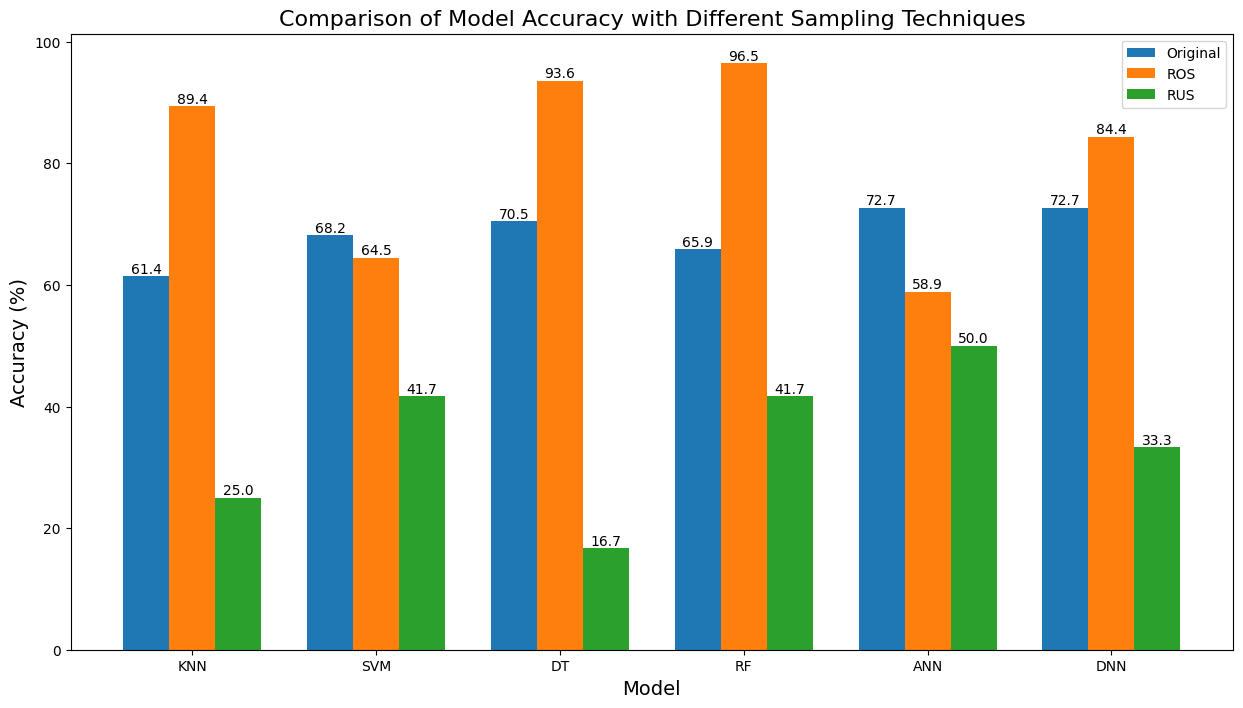

In [439]:
import matplotlib.pyplot as plt

bar_width = 0.25
index = range(len(models))

fig, ax = plt.subplots(figsize=(15, 8))

bar1 = ax.bar(index, accuracy_original, bar_width, label='Original')
bar2 = ax.bar([i + bar_width for i in index], accuracy_ros, bar_width, label='ROS')
bar3 = ax.bar([i + 2 * bar_width for i in index], accuracy_rus, bar_width, label='RUS')

ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Comparison of Model Accuracy with Different Sampling Techniques', fontsize=16)
ax.set_xticks([i + bar_width for i in index])
ax.set_xticklabels(models)
ax.legend()

def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)

plt.show()

# 9. Streamlit

# 10. Kesimpulan